In [ ]:
import pandas as pd
import numpy as np
import csv
import operator
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:



dframe = pd.read_csv("/content/drive/My Drive/Ai_Assignment3/dataset_Facebook.csv", sep=';')
TotalInteraction = dframe["Total Interactions"]
TotalLikes=dframe["Page total likes"]
Type=dframe["Type"]
LifeTymeReach=dframe["Lifetime Post Total Reach"]

d = {'Type':Type,'Page total likes':TotalLikes,'Total Interactions':TotalInteraction,'Lifetime Post Total Reach':LifeTymeReach}
TestFrame=pd.DataFrame(d)
print (TestFrame)


       Type  Page total likes  Total Interactions  Lifetime Post Total Reach
0     Photo            139441                 100                       2752
1    Status            139441                 164                      10460
2     Photo            139441                  80                       2413
3     Photo            139441                1777                      50128
4     Photo            139441                 393                       7244
..      ...               ...                 ...                        ...
495   Photo             85093                  84                       4684
496   Photo             81370                  75                       3480
497   Photo             81370                 115                       3778
498   Photo             81370                 136                       4156
499   Photo             81370                 119                       4188

[500 rows x 4 columns]


In [ ]:
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        # print("X yarrr ",x)
        if(x!=0):
          distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

In [ ]:
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    for x in range(len(trainingSet)):
        
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        # print(dist)
        # print(distances)
        distances[x] = dist[0]
 
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
 
    neighbors = []
    
    for x in range(k):
        neighbors.append(sorted_d[x][0])
 
    classVotes = {}
 
 
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][0]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
 
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors,)
 

KNN Classification Algoritim

In [ ]:
testSet = [["Status",139441,164,10460]]

test = pd.DataFrame(testSet)
K=10
result,neighbour = knn(TestFrame, test, K)
# Predicted class
print('\nPredicted Class of the datapoint = ', result)

# Nearest neighbor
print('\nNearest Neighbour of the datapoints = ',neighbour)
neighbourframe= TestFrame.iloc[np.array(neighbour), :]
TypeArray=(neighbourframe["Type"].to_numpy())
count=0
for i in range(len(TypeArray)):
  if TypeArray[i]==result:
    count=count+1
print (count/K*100,"% Accuracy")    
# tempCluster=X.iloc[np.array(np.where(idx == i))[0], :]

  #  for x in range(len(neighbour)):
# Accuracy_Measure(TestFrame,10,K)


Predicted Class of the datapoint =  Status

Nearest Neighbour of the datapoints =  [1, 5, 15, 28, 6, 60, 8, 73, 72, 24]
60.0 % Accuracy


In [ ]:
# def Accuracy_Measure(DataFrame,TestSamples,K):
#   DataSample=DataFrame.sample(n = TestSamples)
#   print(DataSample)
#   for x in range(len(DataSample)):
#     print("Actual Data")
#     print(DataSample.iloc[x])
#     result,neighbour = knn(DataFrame,DataSample, K)
#     # Predicted class
#     print('\nPredicted Class of the datapoint = ', result)

#     # Nearest neighbor
#     print('\nNearest Neighbour of the datapoints = ',neighbour)







K Means Clustering
Making initial Random Clusters 




In [ ]:
X=TestFrame.sample(frac = 1)

print((X))
K=6
rowsPCluster=int(500/K)
leftover=500%K

clusters=[]
start=0
end=rowsPCluster
print(rowsPCluster)
initial_centroids=[]
for x in range(K):
   print (x)
   if x==K-1 :
     end=end+leftover
     temp=X[start:end+leftover]
   else:  
     temp=X[start:end]
   initial_centroids.append(X.iloc[np.random.randint(start,end)].to_numpy())
   start=start+rowsPCluster
   end=end+rowsPCluster
   clusters.append(temp)



       Type  Page total likes  Total Interactions  Lifetime Post Total Reach
56    Photo            138329                 220                       5812
320   Photo            123047                  41                      13544
193   Photo            133594                 133                       3934
154   Photo            135713                 387                       5568
183   Video            134879                 472                      30624
..      ...               ...                 ...                        ...
142  Status            136013                1009                      31136
238   Photo            131300                 128                       3384
433   Photo            100732                 237                      11420
24   Status            138414                 121                       8488
172  Status            135195                 228                      21256

[500 rows x 4 columns]
83
0
1
2
3
4
5


In [ ]:
def compute_centroids(X, idx, K):
  m, n = 500,4
  centroids = np.zeros((K, n))  #3*4
  '''Return Updated Values of all K centroids'''
  # print (idx)
  # Your Code Here
  for i in range(K):
    # col1 = 0
    col2 = 0
    col3 = 0
    col4 = 0
    total = 0
    for k in range(m):
      if int(idx[k]) == i:
                             #for the categorized clusters add each column and then divide from total number of points in that specific cluster
        # col1 += X[k][0]
        col2 = col2 + X.iloc[k][1]
        col3 = col3 + X.iloc[k][2]
        col4 = col4 + X.iloc[k][3]
        total=total+1
    # col1 = col1/total
    # print (total," And ",K," Fffs ",m)

    col2 = col2/total
    col3 = col3/total
    col4 = col4/total
    # centroids[i][0] = col1                        #update each column of the cluster
    centroids[i][1] = col2
    centroids[i][2] = col3
    centroids[i][3] = col4

  return centroids     

Making Centroids

In [ ]:
def find_closest_centroids(X, centroids):
  m = 500 # no of datapoints
  k = len(centroids)  #division size
  idx = np.zeros(m) # array to assign the centriod
  # print (centroids)  
 
  # Your Code Here
  for i in range (m):
    distances =[]

    for j in range (k):
      dist=euclideanDistance(X.iloc[i], (centroids[j]),4)
      distances.append(dist)
    # print(distances)                           #inbuilt function to compute euclidean distance
    min_dist = np.argmin(distances)                                             #return the cluster number with minimum dist
    # print (min_dist)
    idx[i] = min_dist                                                           #store assigned cluster number in a corresponding array
    #print(X[i])
    #print(distances)
    #print(idx[i])
    
  return idx

In [ ]:
def run_k_means(DataFrame, initial_centroids, max_iters):
  m, n = 500,4
  K = len(initial_centroids)
  idx = np.zeros(m)
  centroids = initial_centroids
  # print (centroids)  
  for i in range(max_iters):
    # find closest centroid
    idx = find_closest_centroids(DataFrame, centroids)
    # print (idx)
    # update centroids
    # print (centroids)
    centroids = compute_centroids(DataFrame, idx, K)
    # print (centroids)
  return idx, centroids

In [ ]:
idx, centroids = run_k_means(X, initial_centroids, 100)# use 2000 iterations to perform clustering
print (idx)
print (centroids)
print (X)




[array(['Photo', 116435, 203, 5490], dtype=object), array(['Photo', 138329, 337, 25248], dtype=object), array(['Photo', 136013, 39, 1080], dtype=object), array(['Photo', 113028, 121, 9084], dtype=object), array(['Photo', 136642, 7, 729], dtype=object), array(['Photo', 138353, 58, 1728], dtype=object)]
[4. 0. 4. 4. 2. 0. 2. 2. 4. 0. 4. 4. 4. 4. 0. 3. 4. 3. 3. 3. 2. 4. 4. 4.
 3. 2. 4. 4. 4. 4. 0. 3. 4. 2. 1. 4. 4. 4. 5. 4. 4. 0. 4. 4. 0. 2. 3. 3.
 3. 0. 4. 3. 4. 4. 4. 4. 4. 4. 2. 0. 4. 5. 0. 0. 5. 4. 4. 4. 0. 3. 4. 3.
 4. 2. 2. 4. 5. 3. 3. 5. 5. 4. 3. 1. 3. 2. 3. 4. 4. 4. 2. 2. 4. 5. 4. 3.
 2. 4. 3. 3. 4. 3. 4. 0. 4. 4. 4. 2. 4. 0. 4. 4. 5. 4. 0. 3. 2. 3. 5. 4.
 5. 4. 0. 4. 3. 5. 4. 0. 2. 0. 4. 2. 2. 4. 5. 0. 4. 4. 2. 2. 0. 3. 2. 4.
 3. 4. 3. 3. 4. 0. 0. 3. 0. 4. 3. 0. 4. 4. 4. 4. 3. 0. 4. 4. 0. 4. 4. 4.
 4. 4. 4. 3. 3. 4. 4. 4. 4. 4. 3. 4. 4. 4. 3. 0. 0. 4. 4. 0. 2. 4. 5. 0.
 4. 0. 5. 3. 4. 3. 4. 4. 0. 4. 0. 4. 4. 4. 4. 4. 3. 4. 5. 1. 4. 4. 1. 4.
 3. 4. 3. 4. 0. 4. 4. 5. 4. 0. 5. 3. 4. 

In [ ]:
# k_Meancluster1 = X[]
# k_Meancluster2 = X[np.where(idx == 1)]
# k_Meancluster3 = X[np.where(idx == 2)]
MeanClusters=[]


for i in range(K):
  tempCluster=X.iloc[np.array(np.where(idx == i))[0], :]
  MeanClusters.append(tempCluster)
# for i in range(K):
#   print(MeanClusters[i])

      Type  Page total likes  Total Interactions  Lifetime Post Total Reach
320  Photo            123047                  41                      13544
355  Photo            116435                 188                       4910
368  Photo            115368                  54                      11336
376  Photo            111620                  79                       6596
395  Photo            107907                  58                       3544
..     ...               ...                 ...                        ...
369  Photo            113028                 200                       5582
350  Photo            116435                 190                       5728
367  Photo            115368                 189                       5594
327  Photo            120050                 122                       3776
407  Photo            106928                  67                       2970

[86 rows x 4 columns]
      Type  Page total likes  Total Interactions  Lifetime Post T

Clusters After  Mean Clustering

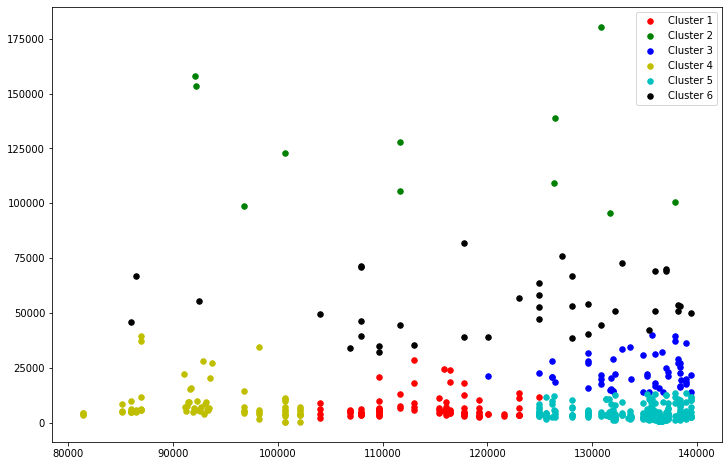

In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))

# MeanClusters[3].plot(kind='scatter',x='Total Interactions',y='Lifetime Post Total Reach',color='red')
# plt.show()
fig, ax = plt.subplots(figsize=( 12,8))
ax.scatter(MeanClusters[0].values[:,1], MeanClusters[0].values[:,3], s=30, color='r', label='Cluster 1')
ax.scatter(MeanClusters[1].values[:,1], MeanClusters[1].values[:,3], s=30, color='g', label='Cluster 2')
ax.scatter(MeanClusters[2].values[:,1], MeanClusters[2].values[:,3], s=30, color='b', label='Cluster 3')
ax.scatter(MeanClusters[3].values[:,1], MeanClusters[3].values[:,3], s=30, color='y', label='Cluster 4')
ax.scatter(MeanClusters[4].values[:,1], MeanClusters[4].values[:,3], s=30, color='c', label='Cluster 5')
ax.scatter(MeanClusters[5].values[:,1], MeanClusters[5].values[:,3], s=30, color='k', label='Cluster 6')

ax.legend()



Clusters Before  Mean Clustering

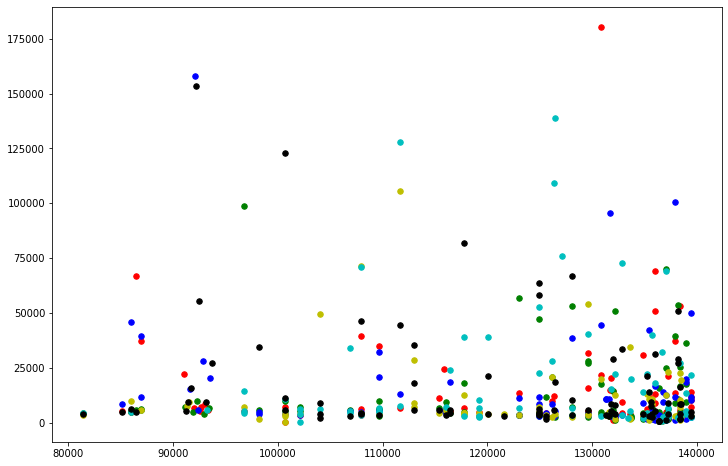

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))


ax.scatter(clusters[0].values[:,1], clusters[0].values[:,3], s=30, color='r', label='Cluster 1')
ax.scatter(clusters[1].values[:,1], clusters[1].values[:,3], s=30, color='g', label='Cluster 2')
ax.scatter(clusters[2].values[:,1], clusters[2].values[:,3], s=30, color='b', label='Cluster 3')
ax.scatter(clusters[3].values[:,1], clusters[3].values[:,3], s=30, color='y', label='Cluster 4')
ax.scatter(clusters[4].values[:,1], clusters[4].values[:,3], s=30, color='c', label='Cluster 5')
ax.scatter(clusters[5].values[:,1], clusters[5].values[:,3], s=30, color='k', label='Cluster 6')

In [ ]:
def Evaluate_DB_Evaluation(DataFrame,Centroid,Clusters,K)